In [1]:
# chaos dynamics(Lorentz equation)
from KernelOnlineEDMD import kEDMD
from onlineSVD import svd_update
from onlineSVD import svd_update
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def lorentz(t, x, sigma, rho, beta):
    dx0dt = sigma * (x[1] - x[0])
    dx1dt = rho * x[0] - x[1] - x[0]*x[2]
    dx2dt = x[0] * x[1] - beta * x[2]
    return [dx0dt, dx1dt, dx2dt]

time_step1 = [0, 5]
sigma = 10
rho = 28
beta = 8
np.random.seed(100)
initial_value = np.random.uniform(low=-15, high=15, size=3)
print(initial_value)
# before change param
sol_lorentz = solve_ivp(lorentz, t_span=time_step1, y0=initial_value, args=[sigma, rho, beta], rtol=1e-8, t_eval=np.arange(0, 5, 0.01))
solution_lorentz = (sol_lorentz.y - np.min(sol_lorentz.y, axis=1).reshape(-1, 1)) / (np.max(sol_lorentz.y, axis=1) - np.min(sol_lorentz.y, axis=1)).reshape(-1,1)
initial_value = (initial_value.reshape(-1,1) - np.min(sol_lorentz.y, axis=1).reshape(-1, 1)) / (np.max(sol_lorentz.y, axis=1) - np.min(sol_lorentz.y, axis=1)).reshape(-1,1)
X_lorentz = solution_lorentz[:, :-1]
Y_lorentz = solution_lorentz[:, 1:]

[ 1.30214825 -6.64891845 -2.26447228]


In [2]:
# kernel EDMD
# 閾値
eps = np.sqrt(10)
c = 1.
threshold = 1e-3
M = X_lorentz.shape[1]

# カーネルKoopman行列を求める
#K_kernel = sp.linalg.inv((G_hat + c*np.eye(M,M))) @ A_hat
#kedmd = kEDMD(X_lorentz, Y_lorentz, kernel="polynomial", p=10, c=1)
kedmd = kEDMD(X_lorentz, Y_lorentz, kernel="gaussian", eps=np.sqrt(2))
kedmd.fit()
print("kedmd done")
# 予測値を求める
pred = []
print(X_lorentz.shape)
for x in X_lorentz.T:
    pred.append(kedmd.predict(x))
error_kedmd = np.linalg.norm(np.array(pred).T - Y_lorentz, axis=0).mean()
print("prediction done")

kedmd done
(3, 499)
prediction done


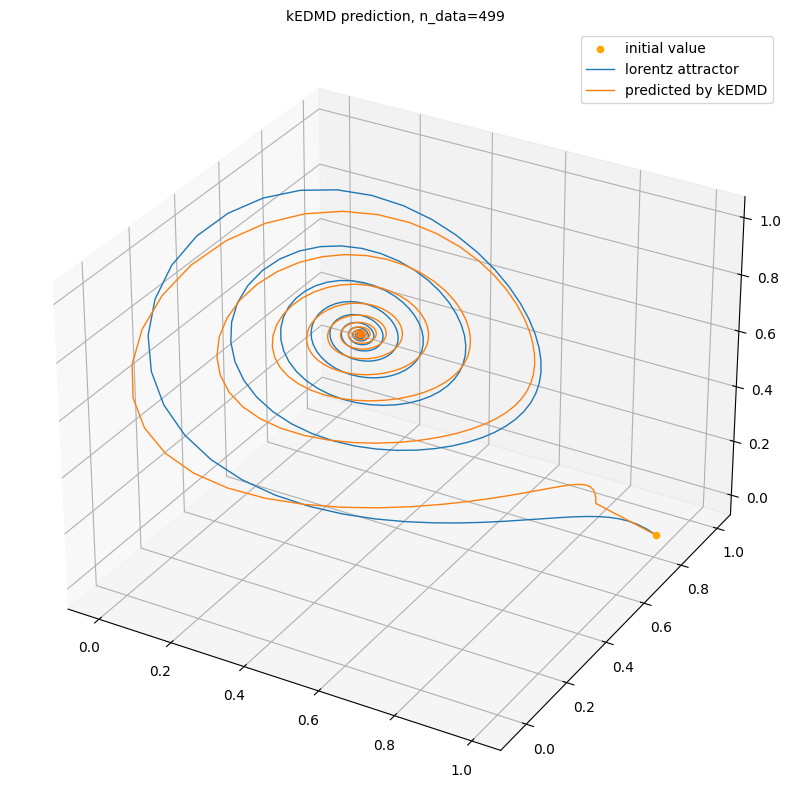

In [4]:
y_kedmd = np.array(pred).T
y_kedmd = np.hstack([initial_value, y_kedmd])
x1 = solution_lorentz[0]
y1 = solution_lorentz[1]
z1 = solution_lorentz[2]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(initial_value[0], initial_value[1],initial_value[2], color="orange", label="initial value")
ax.plot(x1, y1, z1,  linewidth=1.0, label="lorentz attractor")
ax.plot(y_kedmd[0], y_kedmd[1], y_kedmd[2], linewidth=1.0, label="predicted by kEDMD")
ax.set_title("lorentz attractor", fontsize=10)
ax.set_title("kEDMD prediction, n_data={}".format(X_lorentz.shape[1]), fontsize=10)
plt.legend(loc="upper right", fontsize=10)

# 3次元プロット
plt.show()